In [79]:
# Data
import pandas as pd
import numpy as np

cars = pd.read_csv('project1.data')

In [80]:
# What does the data look like?
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [81]:
# shape and size
cars.shape

(398, 9)

In [82]:
# information about types of data
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [83]:
# how many values in "horsepower" have a "?"
len(cars[cars["horsepower"] == "?"])

6

In [84]:
# which values in "horsepower" have a "?"
cars[cars["horsepower"] == "?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [85]:
# drop the rows that have "?" for "horsepower"
cars.drop([32, 126, 330, 336, 354, 374],inplace=True)

In [86]:
# what is the shape now?
cars.shape

(392, 9)

In [87]:
# convert the data in "horsepower" from an object to a float
cars['horsepower'] = cars['horsepower'].astype(float)

In [88]:
# is there data missing
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [89]:
# derive statistical information from data: can you predict outliers
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [90]:
# perform one-hot encoding on categorical data:
cars['origin'].unique()

array([1, 3, 2])

In [91]:
# change type of origin to category
cars['origin'] = cars['origin'].astype("category")

In [92]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   model_year    392 non-null    int64   
 7   origin        392 non-null    category
 8   car_name      392 non-null    object  
dtypes: category(1), float64(4), int64(3), object(1)
memory usage: 28.1+ KB


In [93]:
cars = pd.get_dummies(cars, columns=["origin"], drop_first=True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   car_name      392 non-null    object 
 8   origin_2      392 non-null    bool   
 9   origin_3      392 non-null    bool   
dtypes: bool(2), float64(4), int64(3), object(1)
memory usage: 28.3+ KB


<Axes: xlabel='mpg', ylabel='Count'>

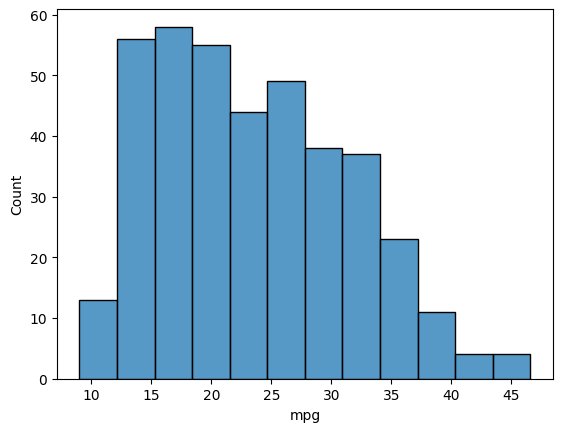

In [94]:
# visualize through univariate and bivariate analysis plots
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=cars['mpg'])

Text(0, 0.5, 'Fuel Efficiency (mpg)')

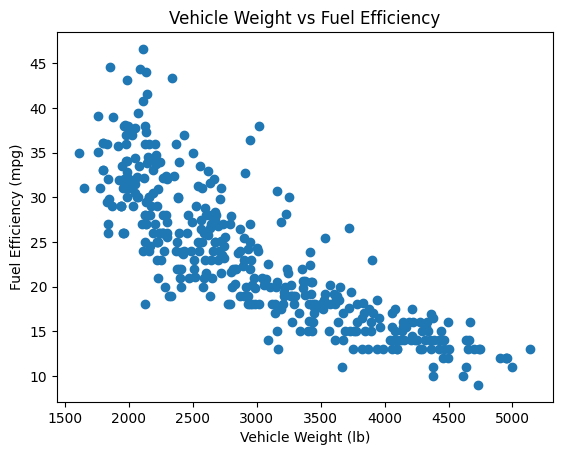

In [95]:
plt.scatter(cars.weight, cars.mpg)
plt.title('Vehicle Weight vs Fuel Efficiency')
plt.xlabel('Vehicle Weight (lb)')
plt.ylabel('Fuel Efficiency (mpg)')

<Axes: xlabel='horsepower'>

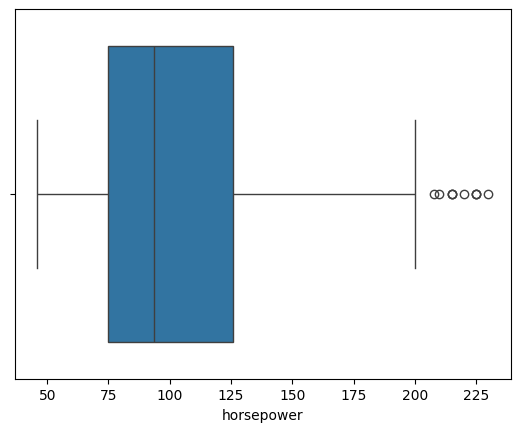

In [96]:
sns.boxplot(data=cars, x='horsepower')

<Axes: xlabel='acceleration'>

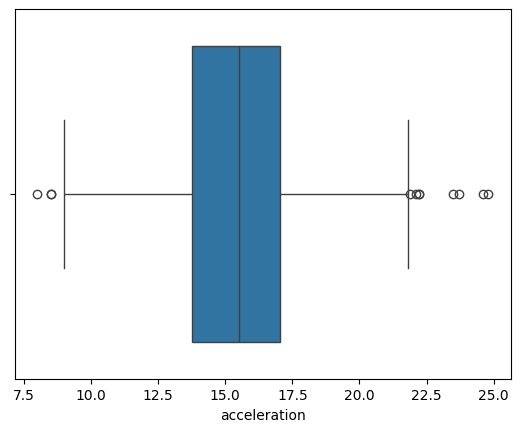

In [97]:
sns.boxplot(data=cars, x='acceleration')

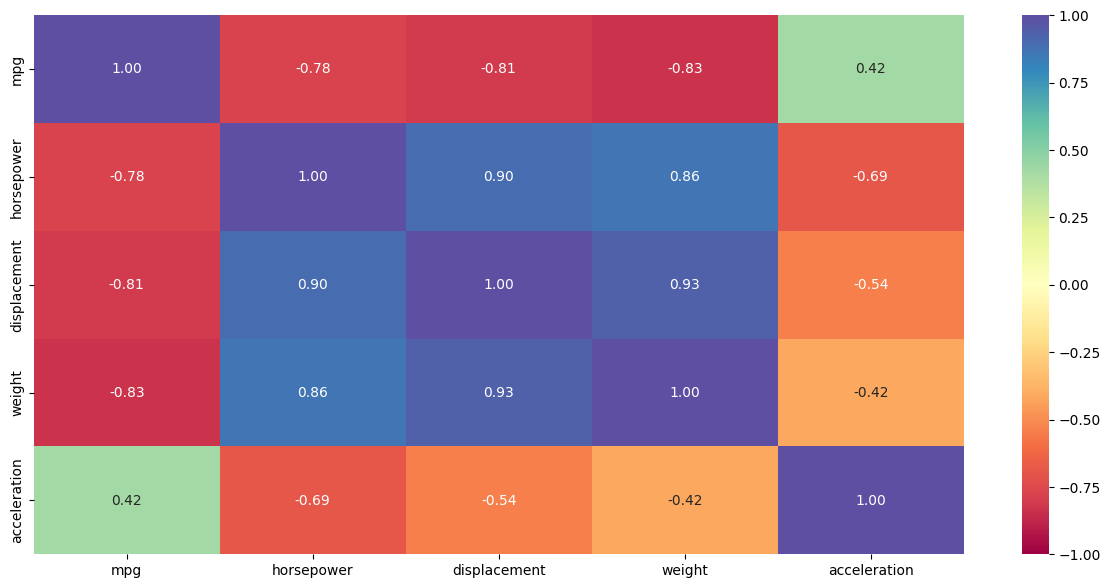

In [98]:
# columns to corrolate
corr_cols=['mpg','horsepower','displacement','weight','acceleration']

# increate the figure size
plt.figure(figsize=(15, 7))

# the actual heat map
sns.heatmap(
   cars[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)

# show the plot
plt.show()

In [99]:
# Fit Regression models on the data to predict the fuel efficiency of cars:
# Split dataset into training and test sets
data_x = cars.drop(['mpg','car_name'], axis=1)
data_y = cars['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=1)

In [100]:
# fit linear regression model
import sklearn
import sklearn.linear_model as linear_model
cars_lr = linear_model.LinearRegression()
cars_lr.fit(X_train, y_train)

LinearRegression()

In [101]:
# Calculate accuracy for training and test data
from sklearn.linear_model import LinearRegression

accuracy_test = cars_lr.score(X_test, y_test)
accuracy_train = cars_lr.score(X_train, y_train)

In [102]:
accuracy_test

0.8242172817490035

In [103]:
accuracy_train

0.8205337631867141